# Step 1: Install Required Libraries

In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Step 2: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Step 3: Load and Explore the Dataset

In [3]:
# Load the dataset
dataset = 'SMSSpamCollection.csv'

df = pd.read_csv(dataset, delimiter='\t', header=None, names=['label', 'message'], encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Step 4: Data Preprocessing

In [4]:
# Encode labels as binary values (spam=1, ham=0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into features and target
X = df['message']
y = df['label']

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
X_train.shape, X_test.shape

((4457,), (1115,))

# Step 5: Convert Text Data to Feature Vectors

In [5]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data, and transform the test data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Display the shape of the feature matrices
X_train_vectorized.shape, X_test_vectorized.shape


((4457, 7734), (1115, 7734))

# Step 6: Train the Model

In [6]:
# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_vectorized, y_train)


MultinomialNB()

# Step 7: Make Predictions and Evaluate the Model

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
[[966   0]
 [  8 141]]


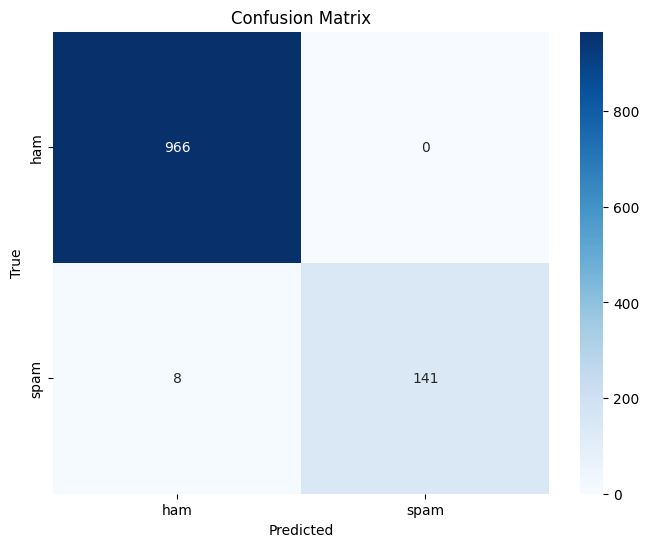

In [8]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()